# Python Exam (Master, 09/11/2021): Coupled harmonic oscillators

> + **Allocated time:** 1.5h
> + **Send your final notebook** at the end of the exam at [romain.madar@cern.ch](mailto:romain.madar@cern.ch) and [louis.vaslin@cern.ch](mailto:louis.vaslin@cern.ch)
> + **Allowed documents:** documentation of [python](https://docs.python.org/3/), [numpy](https://numpy.org/devdocs/user/index.html), [matplotlib](https://matplotlib.org/contents.html), [pandas](https://pandas.pydata.org/pandas-docs/stable/) and [scipy](https://docs.scipy.org/doc/scipy/reference/) as well as the documentation from the notebook interface using `Shift+tab` keyboard shortcut, `help(module)` or `help(function)`.
> 
> The final mark will be a number between 0 (very bad) and 20 (very good). The evaluation of this exam takes into account mainly the correctness of the answers, but also the clarity of the explanations and the quality of the code. *There is no required knowledge about coupled oscillators to answer the questions asked in this exam.*

## General informations

### A bit of context ...

The dynamic of harmonic oscillators is almost everywhere in physics, from the simple pendulum to wave propagation, including quantum field theory describing elementary particles and their interactions. The only needed information about an oscillator is that it is described by a single variable varying with time (one can think about an angle of a pendulum or the height of hanging mass to a spring). In the following this coordinate will be written $r_i(t)$ for the $i^{th}$ oscillator and $v_i(t)$ is defined as the velocity of the oscillator: $v_i(t) \equiv \mathrm{d}r_i/\mathrm{d}t$.

### Data format

For N oscillators described for $n$ times values, the data to be analyzed are provided in the `csv` format with $2N+1$ columns and $n$ lines. The first column is the value of the time in second, the second column is the position of the first oscillator $r_1$, the third column is the velocity of the first oscillator $v_1$, etc ...

### Exam organisation

This exam proposes few studies of harmonic oscillators, organized into two parts. The first part is dedicated to a system of two coupled oscillators while the second part focuses on a vibrating string dynamic. But before these two part, some questions on the lectures are proposed. A bonus question can be done at the end if time allows.


### Import packages and plot cosmetics

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import matplotlib as mpl
mpl.rcParams['legend.frameon'] = False
mpl.rcParams['legend.fontsize'] = 'xx-large'
mpl.rcParams['xtick.labelsize'] = 16
mpl.rcParams['ytick.labelsize'] = 16
mpl.rcParams['axes.titlesize'] = 18
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['lines.linewidth'] = 2.5
mpl.rcParams['figure.figsize'] = (10, 7)

## 0. Questions on the lecture [3pts]

**0.1 [1pts]** Give three caracteristics of a numpy array

**0.2 [1pts]** Explain in one sentence what the *vectorization* in numpy

**0.3 [1pts]** Give two examples of different behaviour of numpy array and python list

## 1. Two coupled oscillators (12pts)

**1.1. [1pts]** Load the `csv` file `two_oscillators.csv` as panda dataframe and print the position of the two oscillators for the 5 first time values.

In [5]:
df = pd.read_csv('two_oscillators.csv')
df.head()

,time,r1,v1,r2,v2
0,0.00000,-0.200000,0.000000,0.500000,0.000000
1,0.40016,-0.195610,0.021870,0.492415,-0.037805
2,0.80032,-0.182607,0.042915,0.469912,-0.074355
3,1.20048,-0.161481,0.062338,0.433237,-0.108439
4,1.60064,-0.133031,0.079404,0.383606,-0.138930


**1.2. [2pts]** What is the initial condition of the system? Plot the evolution of $r_1(t)$ and $r_2(t)$ with time on the same figure. What is roughly the period of the oscillations (one can adujst the x-axis scale to make the plot more readable)?

(0.0, 50.0)

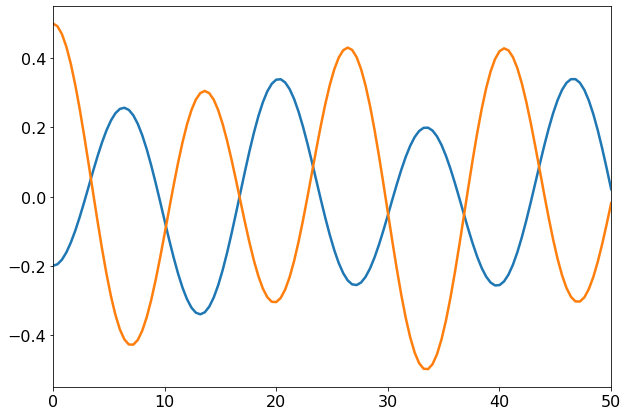

In [6]:
plt.plot(df.time, df.r1)
plt.plot(df.time, df.r2)
plt.xlim(0, 50)

**1.3 [3pts]** Compute the velocity of the first oscillator *from its position only*. As a reminder the *numerical derivative* of a quantity $x$ known for discrete time values is defined as 
$$
\frac{\mathrm{d}x}{\mathrm{d}t} = \frac{x(t_j) - x(t_{j-1})}{t_{j} - t_{j-1}}
$$
(this corresponds to the estimation of the derivated at $t = (t_{j} + t_{j-1}) / 2$

Is the size of the obtained array the same as the columns of the dataframe (and why)?

**Important**: for this question you must manipulate directly numpy array (and not dataframe column). To do so, you can use the following syntax: `array_myVar = df.myVar.values`, where `myVar` is the name of a dataframe column

In [7]:
# Computation of the velocities
dts = df.time.values[1:] - df.time.values[:-1]
drs = df.r1.values[1:]-df.r1.values[:-1]
new_v1 = drs/dts

**1.4 [2pts]** Plot on the same figure the obtained velocity versus time, and the provided velocity versus time. Pay attention to the time values you use for each case.

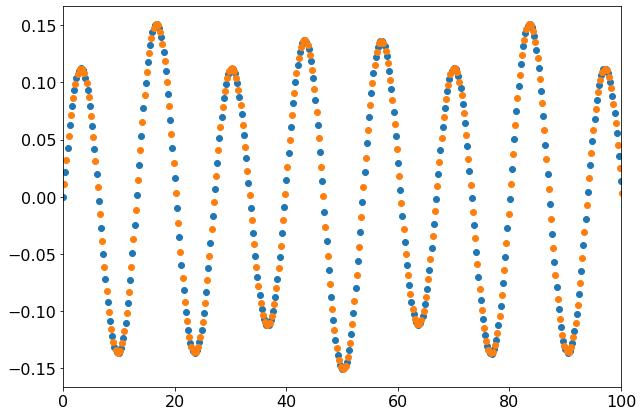

In [8]:
# Compute the proper time values for the by-hand derivative
ts = (df.time.values[1:] + df.time.values[:-1]) / 2

# Comparison with the original veolicities
plt.plot(df.time, df.v1 , 'o')
plt.plot(ts, new_v1, 'o')
plt.xlim(0, 100);

**1.5 [2 pts]** In this question, we want to check whether the motion of each oscillator is symetric with respect to its rest position $r_i=0$. By defining four masks (first/second oscillator being on the positive/negative side), compute the four corresponding position means. In the same way, compute the average velocities for the four cases.

In [9]:
# Define masks
pos1, pos2 = df.r1>0, df.r2>0

# Print the position mean for each cases
print(f'r1: <pos>={df.r1[pos1].mean():.2f}  <neg>={df.r1[~pos1].mean():.2f}')
print(f'r2: <pos>={df.r2[pos2].mean():.2f}  <neg>={df.r2[~pos2].mean():.2f}')

# Print the velocities mean for each cases
print(f'v1: <pos>={df.v1[pos1].mean()*1000:.2f}  <neg>={df.v1[~pos1].mean()*1000:.2f}')
print(f'v2: <pos>={df.v2[pos2].mean()*1000:.2f}  <neg>={df.v2[~pos2].mean()*1000:.2f}')

r1: <pos>=0.18  <neg>=-0.18
r2: <pos>=0.25  <neg>=-0.25
v1: <pos>=0.15  <neg>=0.19
v2: <pos>=-0.66  <neg>=-0.06


**1.6 [2 pts]** Plot the distribution of the position of each oscillator when the velocity is below and above 50% of the maximum velocity (in absolute value)? One can plot one figure per oscillator, and overlay position distributions for fast and slow motions on each figure.

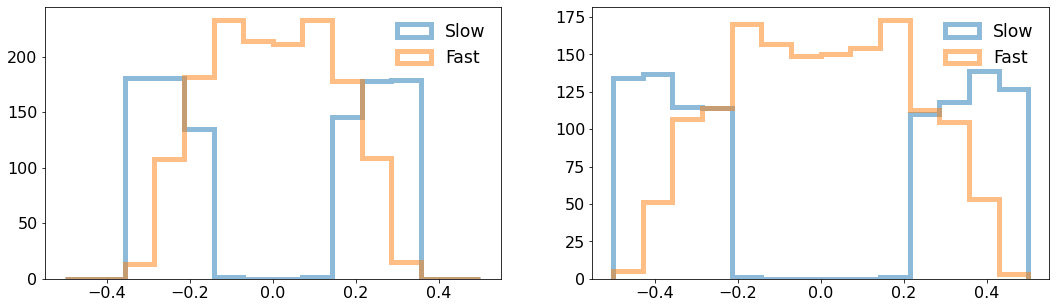

In [12]:
# Histo style
hist_style = {'bins': np.linspace(-0.5, 0.5, 15), 'histtype': 'step', 'linewidth': 5, 'alpha': 0.5,}

# Figure
plt.figure(figsize=(18, 5))

# Oscillator 1
plt.subplot(1, 2, 1)
slow = df.v1.abs() < 0.5 * df.v1.abs().max()
fast = df.v1.abs() > 0.5 * df.v1.abs().max()
plt.hist(df.r1[slow], label='Slow', **hist_style)
plt.hist(df.r1[fast], label='Fast', **hist_style)
plt.legend()

# Ocsillator 2
plt.subplot(1, 2, 2)
slow = df.v2.abs() < 0.5 * df.v2.abs().max()
fast = df.v2.abs() > 0.5 * df.v2.abs().max()
plt.hist(df.r2[slow], label='Slow', **hist_style)
plt.hist(df.r2[fast], label='Fast', **hist_style)
plt.legend();

## 2. Vibrating string [5pts]

We assuming now that each oscillator moves along the y direction, *i.e* $r_i(t) = y_i(t)$, but has a fixed position along the x direction. To simplify, we choose the x value of the $i^{th}$ oscillator to be $x_i = i$. This system describes then an horizontal string vibrating in one dimension.

**2.1. [1pts]** Load the `csv` file `n_oscillators.csv` as panda dataframe and check how many oscillators are in the system, and how many time values are considered, and for which time interval.

In [13]:
dfs = pd.read_csv('n_oscillators.csv')
dfs.head()

,time,r1,v1,r2,v2,r3,v3,r4,v4,r5,...,r196,v196,r197,v197,r198,v198,r199,v199,r200,v200
0,0.00000,0.500000,0.000000,0.500000,0.000000,0.500000,0.000000e+00,0.5,0.000000e+00,0.5,...,0.5,0.000000e+00,0.5,0.000000e+00,0.500000,0.000000e+00,0.500000,0.000000,0.500000,0.000000
1,0.40016,0.496007,-0.019901,0.499995,-0.000053,0.500000,-4.290844e-08,0.5,-1.687418e-11,0.5,...,0.5,-3.726124e-15,0.5,-1.687418e-11,0.500000,-4.290844e-08,0.499995,-0.000053,0.496007,-0.019901
2,0.80032,0.484157,-0.039168,0.499915,-0.000422,0.500000,-1.356618e-06,0.5,-2.100152e-09,0.5,...,0.5,-1.935600e-12,0.5,-2.100152e-09,0.500000,-1.356618e-06,0.499915,-0.000422,0.484157,-0.039168
3,1.20048,0.464826,-0.057192,0.499576,-0.001401,0.499998,-1.017640e-05,0.5,-3.521921e-08,0.5,...,0.5,-7.117101e-11,0.5,-3.521921e-08,0.499998,-1.017640e-05,0.499576,-0.001401,0.464826,-0.057192
4,1.60064,0.438626,-0.073412,0.498678,-0.003246,0.499989,-4.219920e-05,0.5,-2.599168e-07,0.5,...,0.5,-9.348120e-10,0.5,-2.599168e-07,0.499989,-4.219920e-05,0.498678,-0.003246,0.438626,-0.073412


**2.2 [2pts]** Compute the average and standard deviation of the y-position for each oscillator. Plot both the average and the standard deviation (on separated plots) as function of the position of the oscillator along the x-axis. An explicit `for` loop over the oscillators is allowed. Where does the string vibrate the most?

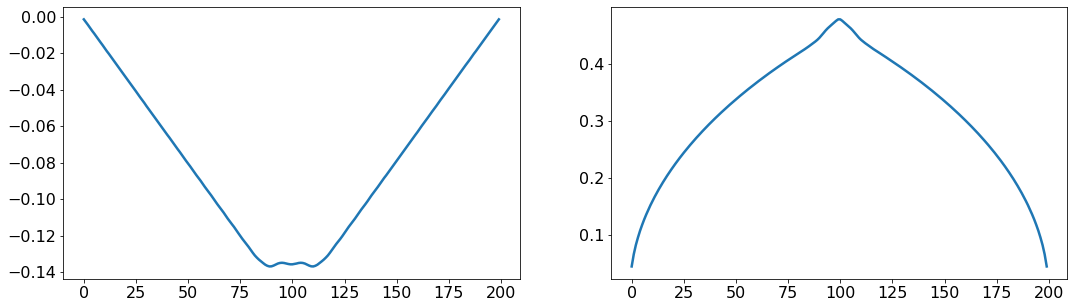

In [15]:
# Compute the numbers
meanY = [dfs[f'r{i+1}'].mean() for i in range(200)]
stdY  = [dfs[f'r{i+1}'].std()  for i in range(200)]

# Plots them
plt.figure(figsize=(18, 5))
plt.subplot(1, 2, 1)
plt.plot(meanY)
plt.subplot(1, 2, 2)
plt.plot(stdY);

**2.3 [2pts]** Plot the string (*i.e.* $y(t)$ as function of $x$) for few time values, namely every 200 seconds approximately. Does this confirm your previous answer?

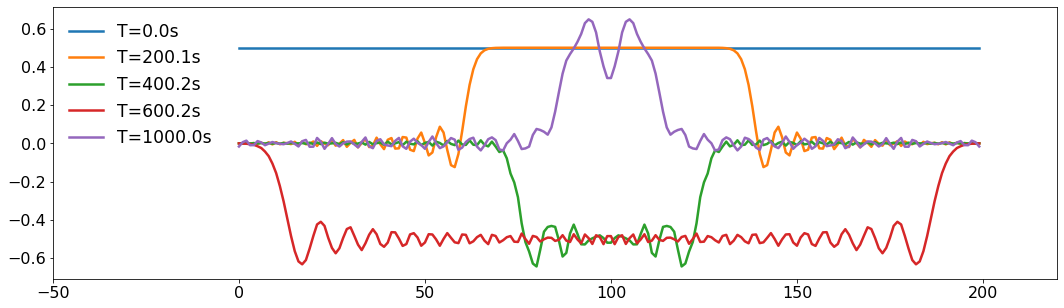

In [16]:
# Getting data
Ys = np.array([dfs[f'r{i+1}'].values for i in range(200)])
Ts = dfs.time.values

# Plotting data
plt.figure(figsize=(18, 5))
for i in [0, 500, 1000, 1500, 2499]:
    plt.plot(Ys[:, i], label=f'T={Ts[i]:.1f}s')
plt.legend()
plt.xlim(-50, 220);

## 3. Bonus question [3pts]

Using the data of the two coupled oscillators motion, plot the "phase diagram", *i.e.*, the velocity *versus* the position. It is also useful to display somehow the time values, in order to have an idea of the motion within the sphase space.

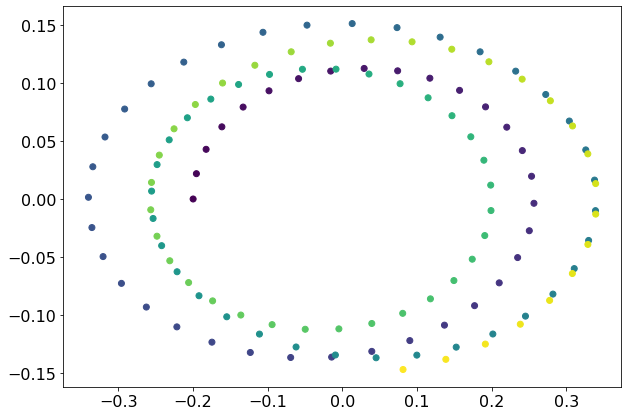

In [21]:
ok = df.time<50
plt.scatter(x=df.r1[ok], y=df.v1[ok], c=df.time[ok]);